### Algorithm Evalution

Purpose to select which is best algorithm for given Specific Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
s= df.isna().sum()
s


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate x and y (Seerate dependen and independent features)

In [8]:
x= df.drop(columns=['PassengerId','Name','Ticket','Survived'])
y= df[['Survived']]

In [9]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Perform cat con seperation

In [11]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [12]:
cat

['Sex', 'Cabin', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
cat1= ['Sex','Embarked']
cat2= ['Cabin']

In [15]:
cat1

['Sex', 'Embarked']

In [16]:
cat2

['Cabin']

### Build a Pipeline for preprocessing

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [18]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Pipeline for Cat1
cat1_pipe= Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Pipeline for Cat2
cat2_pipe= Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine pipeline with Column Transformer
pre= ColumnTransformer([('num',num_pipe,con),
                        ('cat1',cat1_pipe,cat1),
                        ('cat2',cat2_pipe,cat2)])



In [19]:
x_pre= pre.fit_transform(x).toarray()
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
cols= pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Sex_female', 'cat1__Sex_male', 'cat1__Embarked_C',
       'cat1__Embarked_Q', 'cat1__Embarked_S', 'cat2__Cabin_A10',
       'cat2__Cabin_A14', 'cat2__Cabin_A16', 'cat2__Cabin_A19',
       'cat2__Cabin_A20', 'cat2__Cabin_A23', 'cat2__Cabin_A24',
       'cat2__Cabin_A26', 'cat2__Cabin_A31', 'cat2__Cabin_A32',
       'cat2__Cabin_A34', 'cat2__Cabin_A36', 'cat2__Cabin_A5',
       'cat2__Cabin_A6', 'cat2__Cabin_A7', 'cat2__Cabin_B101',
       'cat2__Cabin_B102', 'cat2__Cabin_B18', 'cat2__Cabin_B19',
       'cat2__Cabin_B20', 'cat2__Cabin_B22', 'cat2__Cabin_B28',
       'cat2__Cabin_B3', 'cat2__Cabin_B30', 'cat2__Cabin_B35',
       'cat2__Cabin_B37', 'cat2__Cabin_B38', 'cat2__Cabin_B39',
       'cat2__Cabin_B4', 'cat2__Cabin_B41', 'cat2__Cabin_B42',
       'cat2__Cabin_B49', 'cat2__Cabin_B5', 'cat2__Cabin_B50',
       'cat2__Cabin_B51 B53 B55', 'cat2__Cabin_B57 B59 B63 B66',
       'cat2__Cabin_B58 B60',

In [21]:
xpre= pd.DataFrame(x_pre,columns=cols)
xpre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(xpre, y,test_size=0.2 ,random_state=21)

In [23]:
xtrain.shape

(712, 158)

In [24]:
xtest.shape

(179, 158)

### Evaluate Algorithms

#### If dataset size is bigger you can ignore SVM and KNN (These algorithms are slow and less effective on larger datasets)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
# Create Dictionary of all libraries:
dct= {'LogisticRegression': LogisticRegression(),
      'DecisionTree': DecisionTreeClassifier(),
      'RandomForest': RandomForestClassifier(),
      'GradientBoosting': GradientBoostingClassifier(),
      'KNeighbors': KNeighborsClassifier(),
      'SVM': SVC()}

In [27]:
dct.items()
# Dct items are in the form of (keys(name),values(model))

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier()), ('KNeighbors', KNeighborsClassifier()), ('SVM', SVC())])

### Create a 'for loop' to Evatluate an algorithm

In [28]:
# f1_score is used to know score of categorical variables
# R2 score is used to know score of contineous variables
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
# we will store a results in following 3 lists:
tr= [] #  To store training score (f1 score)
tr_cv= [] # To store cross validation score of training data
ts= [] # To store testing score (f1 score)
for name, model in dct.items():
    # Fir the model on training data
    model.fit(xtrain,ytrain)

    # Predict the test train results
    ypred_tr= model.predict(xtrain)
    ypred_ts= model.predict(xtest)

    # Calculate f1 score in training
    f1_tr= f1_score(ytrain,ypred_tr)

    # Calculate F1 Cross validated results
    scores= cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')# --> It will give 5 diff. scores
    # So here we need to calculate average of all the socres.
    f1_tr_cv= scores.mean()

    # Calculate f1 score in testing
    f1_ts= f1_score(ytest,ypred_ts)

    # Append all the values in lists
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # Print the Results
    print(f'Model_Name: {name}\n')
    print(f'F1 Traiing: {f1_tr:.4f}')
    print(f'F1 TrainingCV: {f1_tr_cv:.4f}')
    print(f'F1 Testing: {f1_ts:.4f}')
    print('\n========================================\n')


Model_Name: LogisticRegression

F1 Traiing: 0.7672
F1 TrainingCV: 0.7131
F1 Testing: 0.7746


Model_Name: DecisionTree

F1 Traiing: 0.9849
F1 TrainingCV: 0.7100
F1 Testing: 0.7324


Model_Name: RandomForest

F1 Traiing: 0.9849
F1 TrainingCV: 0.7147
F1 Testing: 0.7463


Model_Name: GradientBoosting

F1 Traiing: 0.8675
F1 TrainingCV: 0.7373
F1 Testing: 0.7794


Model_Name: KNeighbors

F1 Traiing: 0.7968
F1 TrainingCV: 0.6833
F1 Testing: 0.7536


Model_Name: SVM

F1 Traiing: 0.7619
F1 TrainingCV: 0.7502
F1 Testing: 0.7852




### Create a Dataframe for model evaluation

In [29]:
dct_eval = {'Name':list(dct.keys()),
          'TrainF1':tr,
          'TrainF1CV': tr_cv,
          'TestF1':ts}

In [30]:
df_eval= pd.DataFrame(dct_eval) 
df_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.767176,0.713137,0.774648
1,DecisionTree,0.984906,0.710003,0.732394
2,RandomForest,0.984906,0.714651,0.746269
3,GradientBoosting,0.867470,0.737310,0.779412
4,KNeighbors,0.796844,0.683337,0.753623
5,SVM,0.761905,0.750163,0.785185


In [31]:
df_eval.sort_values(by='TestF1',ascending=False)

,Name,TrainF1,TrainF1CV,TestF1
5,SVM,0.761905,0.750163,0.785185
3,GradientBoosting,0.867470,0.737310,0.779412
0,LogisticRegression,0.767176,0.713137,0.774648
4,KNeighbors,0.796844,0.683337,0.753623
2,RandomForest,0.984906,0.714651,0.746269
1,DecisionTree,0.984906,0.710003,0.732394


##### To select the model we can consider either train CV score or Testing results ( and here we have considered Testing results so we got highest testig score for SVM model)

### Create a Dataframe for model evalution

In [32]:
dct_eval= {'Name': list(dct.keys()),
           'TrainF1': tr,
           'TrainF1CV': tr_cv,
           'TestF1':ts}

In [33]:
df_eval= pd.DataFrame(dct_eval)
df_eval

,Name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.767176,0.713137,0.774648
1,DecisionTree,0.984906,0.710003,0.732394
2,RandomForest,0.984906,0.714651,0.746269
3,GradientBoosting,0.867470,0.737310,0.779412
4,KNeighbors,0.796844,0.683337,0.753623
5,SVM,0.761905,0.750163,0.785185


In [34]:
df_eval.sort_values(by='TestF1',ascending=False)

,Name,TrainF1,TrainF1CV,TestF1
5,SVM,0.761905,0.750163,0.785185
3,GradientBoosting,0.867470,0.737310,0.779412
0,LogisticRegression,0.767176,0.713137,0.774648
4,KNeighbors,0.796844,0.683337,0.753623
2,RandomForest,0.984906,0.714651,0.746269
1,DecisionTree,0.984906,0.710003,0.732394


### Select SVM model

#### Perform Hyperparameter Tunning for selected model

We cannot tune HyperParameters in SVC

In [35]:
from sklearn.svm import SVC
model= SVC( probability= True)
model.fit(xtrain,ytrain)

SVC(probability=True)

#### Evaluate Model

In [36]:
model.score(xtrain,ytrain)

0.8314606741573034

In [37]:
model.score(xtest,ytest)

0.8379888268156425

### Predict Train Test Data

In [38]:
ypred_tr= model.predict(xtrain)
ypred_ts= model.predict(xtest)

In [39]:
ypred_tr[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [40]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [41]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [42]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### Create Confusion Matrics

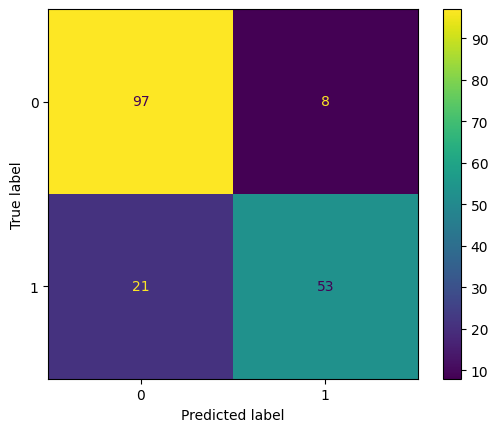

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

### Print Classification report on test Data

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



In [45]:
# Here Accuracy VAlue is is above 80% So model is good and we can use this model for future prediction 

### Calculate ROC - AUC score

ROC= Receiver Operator Characteristics

AUC= ARea Under Curve

ROC-AUC score gives area under ROC curve

This is a metriics used in classification problems, to measure performance of ML model 

In [46]:
# 0----> Negative
# 1----> Positive
# Here TPR means Ratio of out of tottal actual positive values how many values model correctly precticted as positive(i.e; Truely predicted Positive values).
# ANd FPR means  RAtio of out of total actully negative values how many values model predicted as positive but actally are negative(i.e; FAlsly predicted Positive values).
# AUC (Area Under the Cuve ) should be high
# If AUC is High then Model is good model

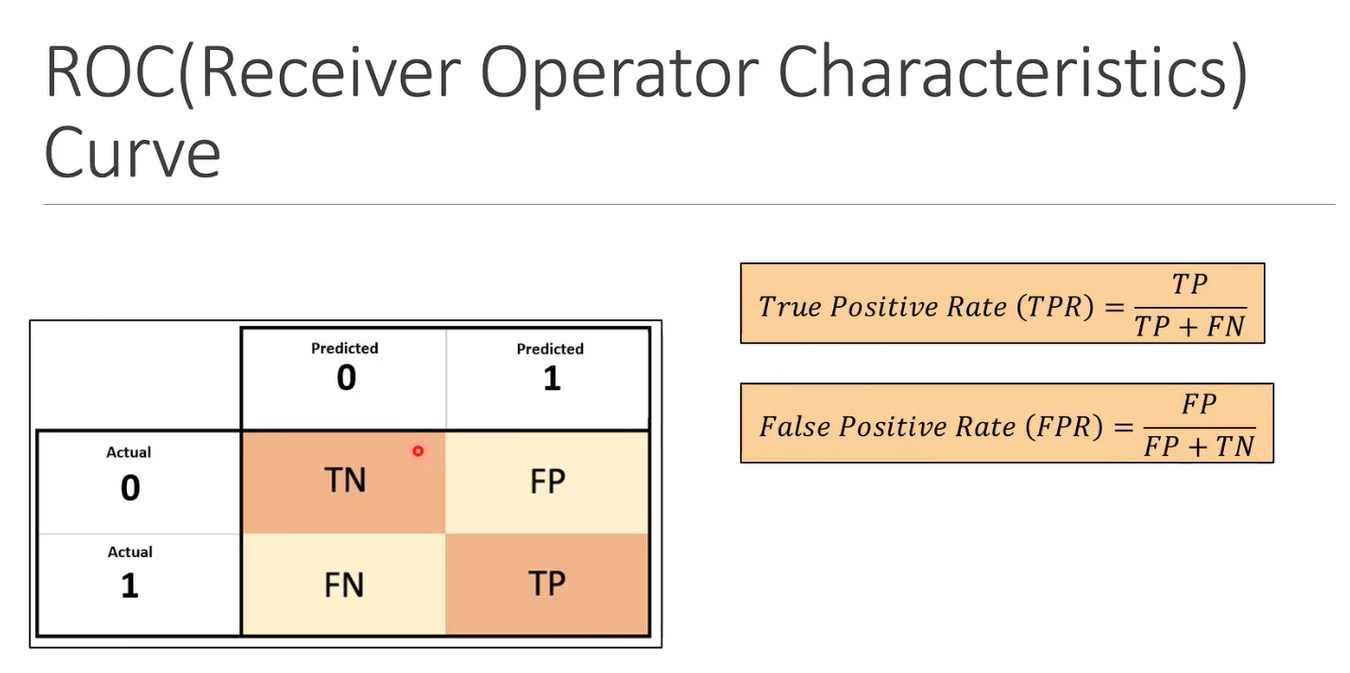

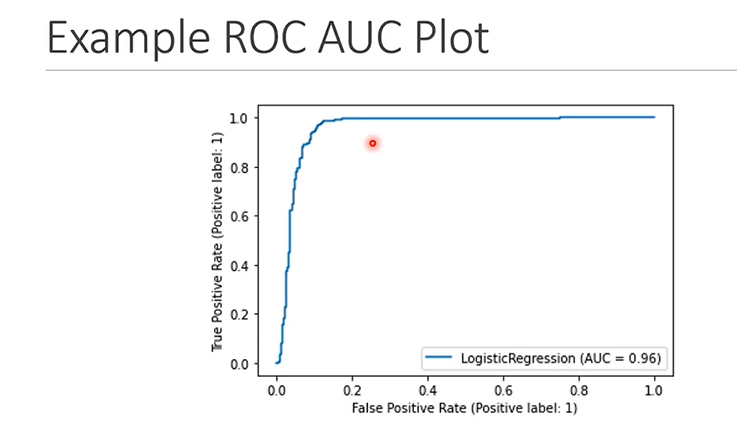

In [47]:
yprob_tr = model.predict_proba(xtrain)
yprob_tr

array([[0.85056122, 0.14943878],
       [0.72282059, 0.27717941],
       [0.5       , 0.5       ],
       ...,
       [0.34483526, 0.65516474],
       [0.88492689, 0.11507311],
       [0.83876362, 0.16123638]])

In [48]:
yprob_tr = model.predict_proba(xtrain)[:,1]
yprob_ts= model.predict_proba(xtest)[:,1]
## Here we required only probability of 1

In [49]:
yprob_tr[0:5]

array([0.14943878, 0.27717941, 0.5       , 0.91965317, 0.1389571 ])

In [50]:
yprob_ts[0:5]

array([0.52708553, 0.14486174, 0.1431186 , 0.23180294, 0.14392841])

In [51]:
## Check roc_auc score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain,ypred_tr)

0.808659405674331

In [52]:
## Check roc_auc score in testing
roc_auc_score(ytest,ypred_ts)

0.82001287001287

In [53]:
### IF score is above 80% then model is good

### Plot the ROC AUC Score

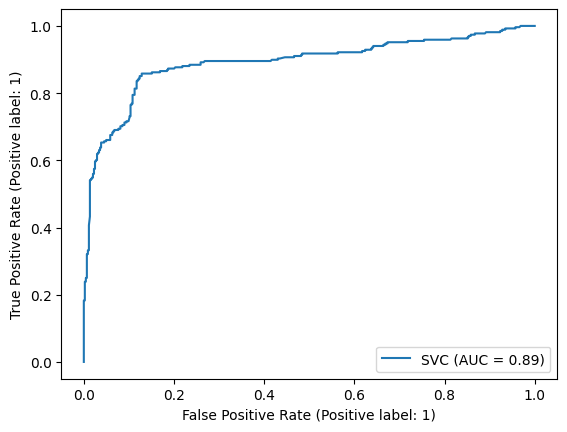

In [54]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,xtrain, ytrain)

In [55]:
## It is Good modwl

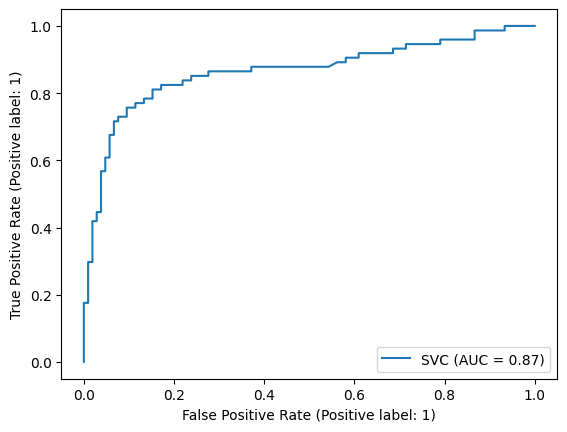

In [56]:
RocCurveDisplay.from_estimator(model,xtest, ytest)

In [57]:
### IT is good model so we can use this moodel for predictions

### Predict the test_titanic.csv

In [58]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
xnew_pre= pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ]])

In [60]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Sex_female,cat1__Sex_male,cat1__Embarked_C,cat1__Embarked_Q,cat1__Embarked_S,...,cat2__Cabin_F E69,cat2__Cabin_F G63,cat2__Cabin_F G73,cat2__Cabin_F2,cat2__Cabin_F33,cat2__Cabin_F38,cat2__Cabin_F4,cat2__Cabin_G6,cat2__Cabin_T,cat2__Cabin_unknown
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# Predict values
preds= model.predict(xnew_pre)
probs= model.predict_proba(xnew_pre)[0:,1]

In [62]:
preds[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [63]:
probs[0:5]

array([0.15182558, 0.51131909, 0.12975732, 0.13740507, 0.5       ])

### Creating results in new datframe

In [64]:
results= xnew['PassengerId']
results

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [65]:
results= xnew[['PassengerId']]
results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [66]:
results['Survival']= preds
results['Probability']= probs

In [67]:
results

,PassengerId,Survival,Probability
0,892,0,0.151826
1,893,1,0.511319
2,894,0,0.129757
3,895,0,0.137405
4,896,0,0.500000
...,...,...,...
413,1305,0,0.137273
414,1306,1,0.917985
415,1307,0,0.147598
416,1308,0,0.137273


<Axes: xlabel='Survival'>

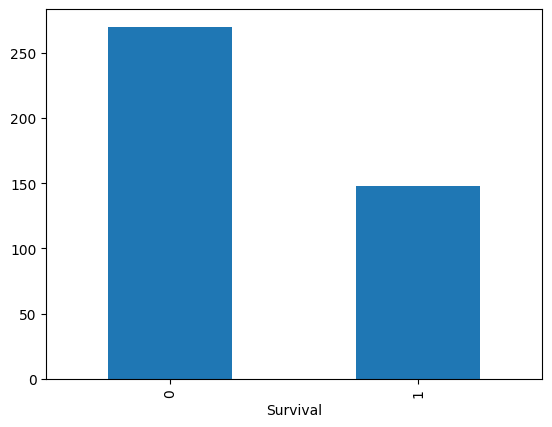

In [68]:
results['Survival'].value_counts().plot(kind='bar')

In [69]:
results.to_csv('results.csv',index=False)